In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [ ]:
dataframe=pd.read_csv("C:\\Users\\dlsub\\heart.csv")
dataframe.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
dataframe.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

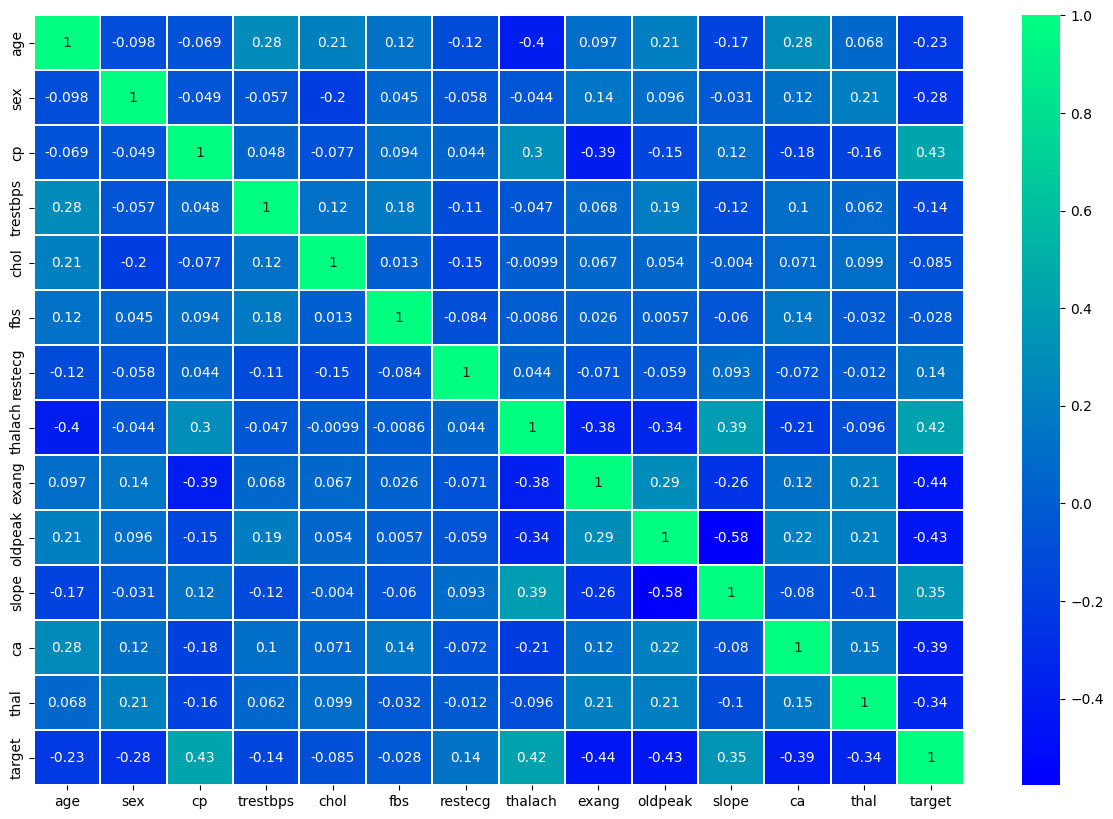

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(dataframe.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

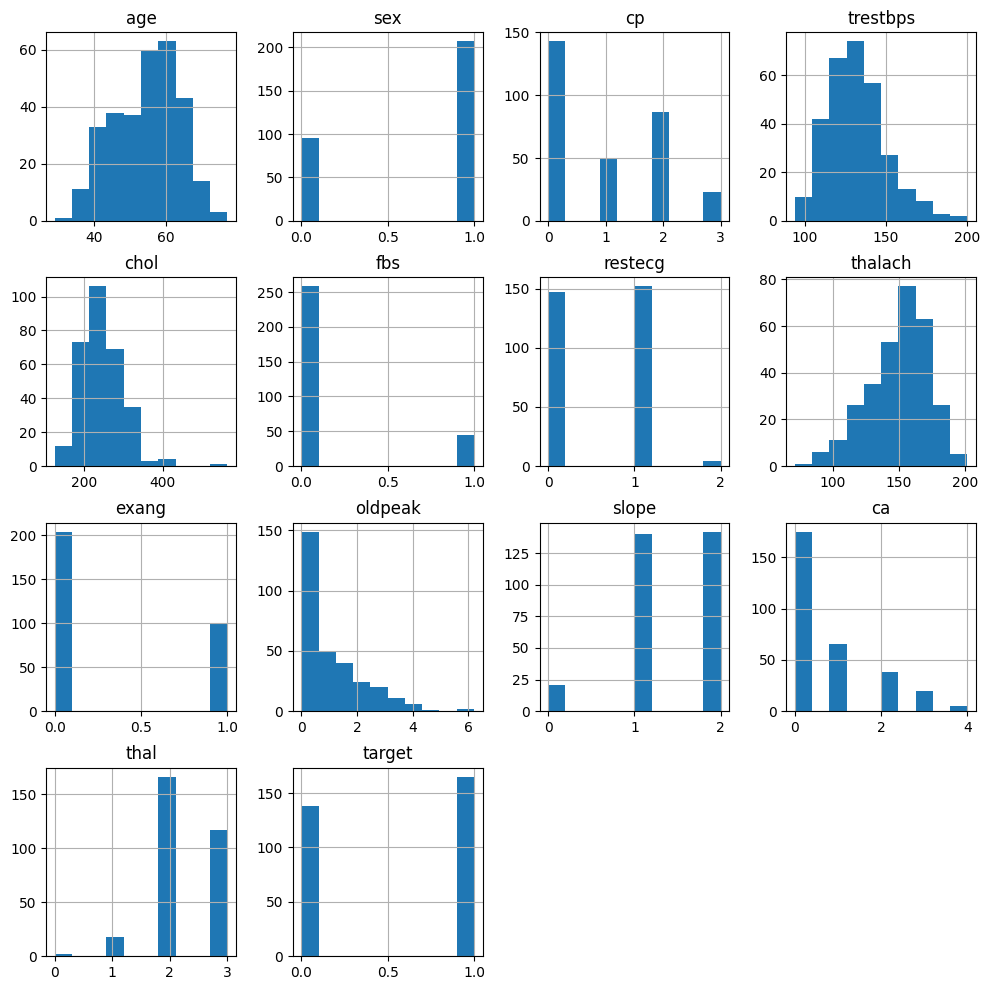

In [ ]:
dataframe.hist(figsize=(12,12))
plt.savefig('featuresplot')

In [ ]:
from sklearn.preprocessing import StandardScaler
# Split into features (X) and target (y)
X = dataframe.drop(columns=['target'])  # Features
y = dataframe['target']  # Target



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Display the shapes of the resulting datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (242, 13)
Testing features shape: (61, 13)
Training target shape: (242,)
Testing target shape: (61,)


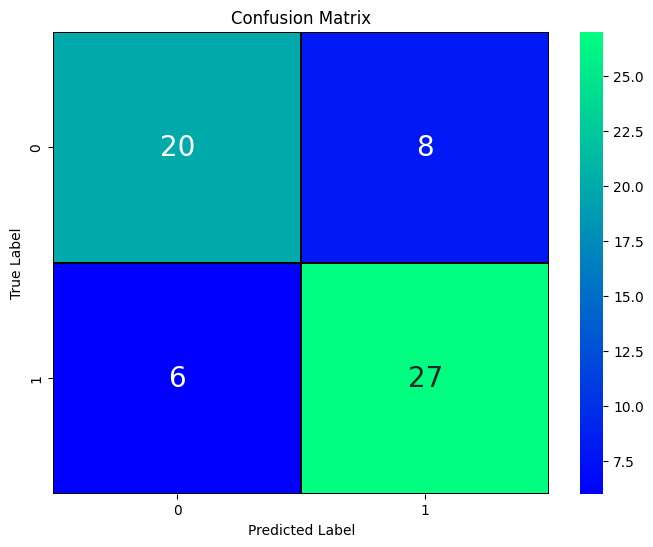

Testing Accuracy for SVM: 0.7704918032786885
Testing Sensitivity for SVM: 0.7704918032786885
Testing Specificity for SVM: 0.7142857142857143
Testing Precision for SVM: 0.7704197441902361
Testing F1 Score for SVM: 0.7696167720275724

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        28
           1       0.77      0.82      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC

# Fit the SVM model
svm = SVC(C=12, kernel='linear', class_weight='balanced')
model = svm.fit(X_train, y_train)

# Make predictions
prediction = model.predict(X_test)

# Confusion matrix
cm4 = confusion_matrix(y_test, prediction)
TN, FP, FN, TP = cm4.ravel()
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, cmap='winter', linewidths=0.3, linecolor='black', annot_kws={"size": 20})
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Calculate metrics
accuracy = accuracy_score(y_test, prediction)
sensitivity = recall_score(y_test, prediction, average='weighted')  # Sensitivity (Recall)
specificity = TN / (TN + FP)  # Specificity calculation
precision = precision_score(y_test, prediction, average='weighted')  # Precision
f1 = f1_score(y_test, prediction, average='weighted')  # F1 Score

# Print metrics
print('Testing Accuracy for SVM:', accuracy)
print('Testing Sensitivity for SVM:', sensitivity)
print('Testing Specificity for SVM:', specificity)
print('Testing Precision for SVM:', precision)
print('Testing F1 Score for SVM:', f1)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, prediction))


In [ ]:
import joblib
joblib.dump(model, 'heartdiseasemodel.pkl')

['heartdiseasemodel.pkl']